TensorBoard 具有下列巧妙的功能，都在浏览器中实现。
- 在训练过程中以可视化的方式监控指标
- 将模型架构可视化
- 将激活和梯度的直方图可视化
- 以三维的形式研究嵌入

我们用一个简单的例子来演示这些功能：在 IMDB 情感分析任务上训练一个一维卷积神经网络。

In [3]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000 # 作为特征的单词个数
max_len = 500 # 在这么多单词之后截断文本（这些单词都属于前max_features个最常见的单词）

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                          input_length=max_len,
                          name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',              
              loss='binary_crossentropy',              
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
________________________________________________

在开始使用 TensorBoard 之前，我们需要创建一个目录，用于保存它生成的日志文件。

In [4]:
import os

os.mkdir('my_log_dir')

我们用一个 TensorBoard 回调函数实例来启动训练。这个回调函数会将日志事件写入硬盘的指定位置。

In [5]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir', # 日志文件将被写入这个位置
        histogram_freq=1, # 每一轮之后记录激活直方图
        embeddings_freq=1, # 每一轮之后记录嵌入数据
    )
]

history = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=callbacks)

Epoch 1/20
157/157 [==============================] - 22s 137ms/step - loss: 0.6992 - acc: 0.5819 - val_loss: 0.4139 - val_acc: 0.8392
Epoch 2/20
157/157 [==============================] - 21s 133ms/step - loss: 0.4352 - acc: 0.8453 - val_loss: 0.4366 - val_acc: 0.8586
Epoch 3/20
157/157 [==============================] - 21s 133ms/step - loss: 0.3656 - acc: 0.8859 - val_loss: 0.4343 - val_acc: 0.8612
Epoch 4/20
157/157 [==============================] - 21s 133ms/step - loss: 0.3246 - acc: 0.9072 - val_loss: 0.4663 - val_acc: 0.8622
Epoch 5/20
157/157 [==============================] - 21s 134ms/step - loss: 0.2856 - acc: 0.9242 - val_loss: 0.5940 - val_acc: 0.8626
Epoch 6/20
157/157 [==============================] - 23s 148ms/step - loss: 0.2448 - acc: 0.9380 - val_loss: 0.6246 - val_acc: 0.8664
Epoch 7/20
157/157 [==============================] - 22s 139ms/step - loss: 0.1991 - acc: 0.9655 - val_loss: 0.7384 - val_acc: 0.8640
Epoch 8/20
157/157 [==============================] - 2

现在，你可以在命令行启动 TensorBoard 服务器，指示它读取回调函数当前正在写入的日志。在安装 TensorFlow 时（比如通过 pip），tensorboard 程序应该已经自动安装到计算机里了。

`$ tensorboard --logdir=my_log_dir`

然后可以用浏览器打开 `http://localhost:6006`，并查看模型的训练过程。除了训练指标和验证指标的实时图表之外，你还可以访问HISTOGRAMS（直方图）标签页，并查看美观的直方图可视化，直方图中是每层的激活值。

关于TensorFlow 图可视化，Keras 还提供了另一种更简洁的方法——keras.utils.plot_model 函数，它可以将模型绘制为层组成的图，而不是 TensorFlow 运算组成的图。使用这个函数需要安装 Python 的 pydot 库和 pydot-ng 库，还需要安装 graphviz库。我们来快速看一下。

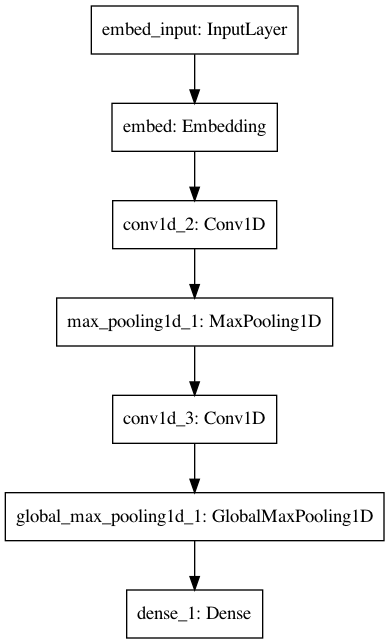

In [4]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

你还可以选择在层组成的图中显示形状信息。下面这个例子使用 plot_model函数及 show_shapes 选项将模型拓扑结构可视化

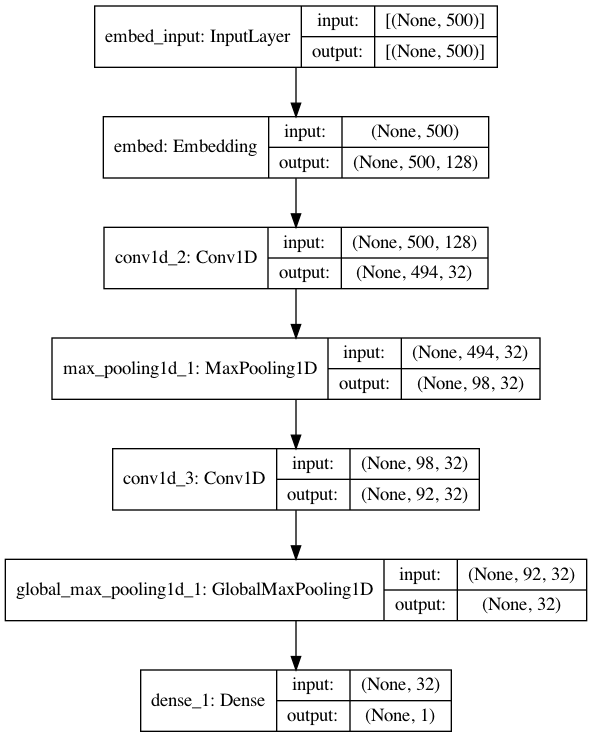

In [5]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model2.png')